<a href="https://colab.research.google.com/github/CharlyAguirre/ADA-informes/blob/main/MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de ordenamiento

**Entrada:** Un arreglo de números que puede o no estar ordenados [x1, x2, x3, ..., xn]

**Salida:** Un nuevo arreglo con los mismos datos de entrada, pero ordenados según de menor a mayor [x1 ≤ x2 ≤ x3 ≤ ... ≤ xn]

Los problemas de ordenamiento son muy recurrentes al momento de plantear la solución a un problema, pero ¿por qué? Estos son planteados con el fin de mantener un orden en la solución, también para una correcta y fácil manipulación de estos datos al momento de ser utilizados para la resolución de un problema mayor.




# 2. MergeSort

Este algoritmo de ordenamiento se basa en la primicia de divide y vencerás, este algoritmo se utiliza a si mismo de manera recursiva para poder realizar el ordenamiento del arreglo que se le es entregado, también contiene dentro una función llamada merge la cual se encarga de realizar comparaciones y combinar arreglos.

## 2.1 Descripción del MergeSort

Como se mencionó anteriormente el MergeSort se llama de manera recursiva, pero para que sirve esto te puedes preguntar, esto sirve ya que el MergeSort va dividiendo el arreglos de manera que lo convierte en dos nuevo arreglos de largo n/2, esto se repite sucesivamente hasta que se llega a unos arreglos de largo = 1. 

En la siguiente imagen se puede observar con más claridad el cómo se va dividiendo el arreglo.

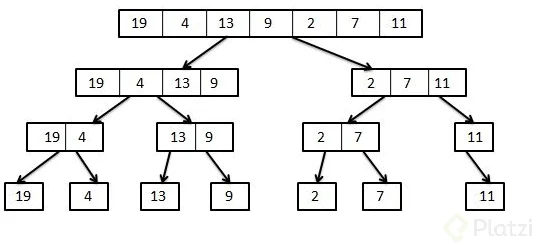

Luego de esto es llamada la función merge para que empiece a combinar y ordenar de menor a mayor los arreglos ya ordenados que se le entregan desde los que tienen largo 1 hasta llegar al largo n, en la siguiente imagen se puede observar con más claridad el cómo se van combinando los arreglos que le son entregados a la función merge.

Como observación puedo acotar que un arreglo de largo 1 se considera que esta ordenado por lo que se dice que la función merge solo recibe arreglos ordenados.




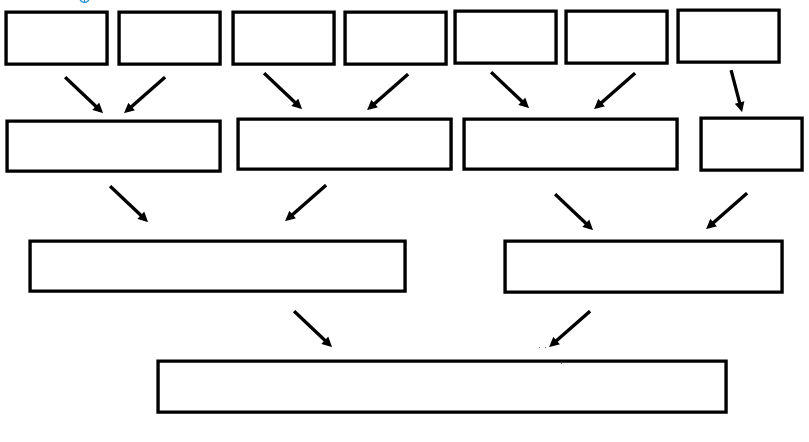

## 2.2 Ejemplo paso a paso del MergeSort

Para empezar, tomaremos de ejemplo el arreglo [4,9,2,1,7,6].

Lo primero que el MergeSort es dividir este arreglo en 2 dejándolo de la siguiente manera.

Arreglo de la izquierda: [4,9,2]		Arreglo de la derecha: [1,7,6]

Ahora estos dos arreglos se le pasan de nuevo al MergeSort y este los divide en 2 nueva mente quedando de esta manera.

Arreglo 1: [4,9,2]	Arreglo de la izquierda: [4,9]		Arreglo de la derecha:[2
]
Como este proceso se tiene que repetir hasta llegar a los a sub-arreglo de largo 1 solo basta repetir esto una vez en los arreglos de la izquierda.

Arreglo 2: [4,9]		Arreglo de la izquierda: [4]		Arreglo de la derecha:[9]

Llegados a este punto el algoritmo empieza a llamar a la función merge para empezar a combinar estos sub-arreglos, para combinarlos primero los compara para observar cual es el mayor y cuál es el menor. 

 [4] < [9] al observar esto la función merge devuelve [4,9].

Ahora volvemos donde quedo el arreglo [2] y la función merge empieza de nuevo.
[4] < [2] compara. Al no ser real los intercambia y combina los arreglos quedando: [2,4,9].

Esto fue por el lado de la izquierda de la primera división, por el lado de la dereche haciendo este mismo proceso llegaría un sub-arreglo de ya ordenado: [1,6,7].

Ahora la función merge es llamada de nuevo y empieza a comparar los datos.
Arreglo Izquierdo: [2,4,9]	Arreglo derecho: [1,6,7].

[2] < [1] NO **->**Arreglo: [1].

[2] < [6] SI **->** Arreglo: [1,2].

[6] < [4] NO **->** Arreglo: [1,2,4].

[6] < [9] SI **->** Arreglo: [1,2,4,6].

[9] < [7] NO **->** Arreglo: [1,2,4,6,7,9] (al ser la última comparación posible el nueve es el último dato).

Arreglo de entrada: [4,9,2,1,7,6].

Arreglo de Salida: [1,2,4,6,7,9].




## 2.3 Codigo del MergeSort




In [169]:
import random
from termcolor import colored
import copy


def MergeSort(arreglo, cont, verbose = False):
  
  #variable que parte el arreglo que se le entrega al mergeSort a la mitad
  mitad = len(arreglo) // 2

  """condicion para deterner la recursion al momento de llegar a len(arreglo) = 1
  sin esta condicion entra en un bucle infinito re recursividad"""
  if len(arreglo) < 2:
      return arreglo, cont

  if(verbose == True):

    print("Arreglo izquierdo: ", arreglo[:mitad])

  """llamando de forma recursiva al mergeSort para dividir el arreglo hasta que 
  llegen a len = 1"""
  arregloDere, cont = MergeSort(arreglo[:mitad], cont, verbose)

  if(verbose == True):
    print("Arreglo derecho: ", arreglo[mitad:])

    print(" ")

  arregloIzqui, cont = MergeSort(arreglo[mitad:], cont, verbose)
  
  #llamado a la funcion merge para que junte los dos arreglos ya ordenados en uno solo
  arreglo, cont = merge(arregloDere, arregloIzqui, cont, verbose)

  return arreglo, cont

def merge(arregloDere, arregloIzqui, cont, verbose):

    
  #indices para las comparaciones
  i,j = 0,0

  #nuevo arreglo donde se combinan los dos arreglos entregados
  arreglo = [] 

  if(verbose == True):

    print("Los arreglos a combinar son ", arregloDere, arregloIzqui)

 
  #while que para realizar las comparaciones para las combinaciones de arreglos
  while(i < len(arregloDere) and j < len(arregloIzqui)):

    cont +=1 

    if (arregloDere[i] < arregloIzqui[j]):

      arreglo.append(arregloDere[i])
      i += 1 

      if(verbose == True):

        print(colored(f"{str(arreglo)[1:-1]}","blue"))

    else:
        
      arreglo.append(arregloIzqui[j])
      j += 1

      if(verbose == True):

        print(colored(f"{str(arreglo)[1:-1]}","blue"))


  # agregamos los datos sobrantes que pertenecen a un arreglo ya ordenado (no se comparan)
  arreglo += arregloDere[i:]
  arreglo += arregloIzqui[j:]

  """Condicion para mostar los ultimos datos agregados al arreglo cuando solo quedan 
  datos para agregar de un solo arreglo """
  if(verbose == True):

    print(colored(f"{str(arreglo)[1:-1]}","blue"))

    print(" ")

 
  # Retornamos el resultados
  return arreglo, cont

arregloInicial = [4,9,12,3,5,1]
cont = 0
print("Entrada: ",arregloInicial)

arregloOrdenado, cont = MergeSort(arregloInicial, cont)

print("Salida : ",arregloOrdenado)
print("Comparaciones : ", cont)

Entrada:  [4, 9, 12, 3, 5, 1]
Salida :  [1, 3, 4, 5, 9, 12]
Comparaciones :  9


## 2.4 Ejecución del algoritmo MergeSort paso a paso (verbose = True)

Con la variable verbose = true podemos observar paso a paso como es que se desarrolla el algoritmo.

In [239]:
import random
arreglo = random.sample(range(1, 100), 6)
cont = 0

print("Arreglo de entrada : ", arreglo)

arreglo,cont= MergeSort(arreglo, cont, verbose=True)

print("Arreglo de salida : ", arreglo)

print("Comparaciones realizadas : ", cont)



Arreglo de entrada :  [97, 81, 91, 83, 72, 75]
Arreglo izquierdo:  [97, 81, 91]
Arreglo izquierdo:  [97]
Arreglo derecho:  [81, 91]
 
Arreglo izquierdo:  [81]
Arreglo derecho:  [91]
 
Los arreglos a combinar son  [81] [91]
81
81, 91
 
Los arreglos a combinar son  [97] [81, 91]
81
81, 91
81, 91, 97
 
Arreglo derecho:  [83, 72, 75]
 
Arreglo izquierdo:  [83]
Arreglo derecho:  [72, 75]
 
Arreglo izquierdo:  [72]
Arreglo derecho:  [75]
 
Los arreglos a combinar son  [72] [75]
72
72, 75
 
Los arreglos a combinar son  [83] [72, 75]
72
72, 75
72, 75, 83
 
Los arreglos a combinar son  [81, 91, 97] [72, 75, 83]
72
72, 75
72, 75, 81
72, 75, 81, 83
72, 75, 81, 83, 91, 97
 
Arreglo de salida :  [72, 75, 81, 83, 91, 97]
Comparaciones realizadas :  10


En el paso a paso del algoritmo podemos ver cómo va dividiendo el arreglo de entrada hasta el punto de que tiene solo arreglos de largo 1. Una vez llegado a ese punto entra en acción la función merge y empieza a combinar estos arreglos hasta volver al largo inicial del arreglo de entrada.

Los números azules que se observan son las iteraciones que hace la función merge para poder combinar los dos arreglos que le son entregados. 

# 3. Tiempo de ejecución

## 3.1 Teorema para el tiempo de ejecucion

El tiempo de ejecución en notación O es de **O(n log n)** para su peor caso.

## 3.2 Comprobación del teorema

Primero para comprobar el teorema propueste debemos identificar cuáles son las operaciones que se realizan en el algoritmo.

Como ya sabemos el mergeSort consta de dos operaciones principales, primero un bucle de manera recursiva que va dividiendo el largo del arreglo en 2 y esto se repite hasta obtener arreglos de largo 1 **(n/2, n/4, n/6, n/8, ..., 1)** la representación matemática de esto es **log n**, considerando cada partición de un arreglo como un nuevo nivel obtenemos log n niveles los cuales se tiene que hacer uso de la otra operación principal la cual es la función merge.

Ahora tenemos que analizar la función merge y ver cuál es su coste. Esta contiene dentro de ella un bucle repetitivo para realizar las comparaciones de los arreglos que se le entregan, considerando que el tiempo para realizar una iteración es constante se tienen que hacer n iteraciones para completar un nivel de los creados por el mergeSort, se realizan n iteraciones ya que por cada una se hace una comparación entre los sub-arreglos que le son entregados y para que el arreglo formado por los dos sub-arreglos pueden llegar a necesitarse n comparaciones.

Con lo analizado anteriormente podemos llegar a la conclusión que el teorema propuesto es correcto ya que por cada nivel se realizan **n** iteraciones y al ser **log n** niveles queda que el tiempo de ejecución del MergeSort es **O(n log n)**





# 4. Correctitud

## 4.1 Teorema.

El algoritmo mergeSort recibe un arreglo de largo n que puede estar o no ordenado y el algoritmo regresa un arreglo ordenado de menor a mayor **[x1 ≤ x2 ≤ x3 ≤ ... ≤ xn]**

## 4.2 Prueba del teorema.

Para probar el teorema usaremos la **propiedad de bucle invariante** "*Al comienzo de cara iteración de la función merge los dos sub-arrelos que recibe estarán ordenados y el arreglo generado por merge esta ordenado *"

**Inicialización:**

Cuando se realiza la primera iteración de la función merge esta recibe dos arreglos de largo 1 por lo que implícitamente estos se encuentran ordenados y el arreglo generado por la función merge todavía no existe en este punto por la cual esta ordenado también, considerando lo anterior la propiedad se cumple.

**Mantención:**

Al avanzar en el bucle de la función merge podemos observar que esta va combinando los dos arreglos en uno solo comparando los datos de los sub-arreglos que se le fueron entregados por lo que los dos sub-arreglos siguen ordenados ya que no han sido modificados y el arreglo generado esta ordenado ya que por condición solo se le agrega el dato menor de los dos comparados en cada iteración.

**Correcitud**

Como conclusión, como la propiedad invariante del bucle es verdadera al inicio y también se mantiene en cada iteración, es correcto el teorema propuesto al principio.


# 5 Experimento y análisis

El experimento que realizaremos a continuación será realizar un gráfico en el cual se encuentran los datos entregados por dos algoritmos de ordenamiento, uno será el MergeSort y el otro será el InsertionSort, la comparación ser hará en base la cantidad de comparaciones realizadas al momento de ordenar el mismo arreglo random.

In [234]:
import random
from termcolor import colored
import copy

def insertionSort (arreglo, verbose=False):
  
  largo = len(arreglo)
  cont = 0

  for i in range (1,largo):

    busq = arreglo[i] #numb a comparar

    j = i-1

    while j >= 0:
      
      cont += 1
      cambio = False

      if busq < arreglo[j]:
        
        arreglo[j+1] = arreglo[j]
        arreglo[j] = busq

      j -= 1

  return arreglo, cont

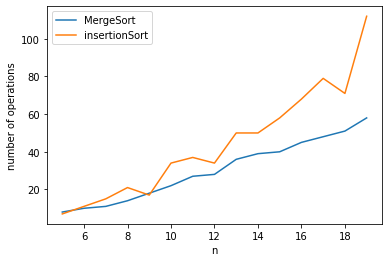

In [246]:
import matplotlib.pyplot as plt
import random
import math

x=[n for n in range(5,20)] 
y1=[]; # worst case
y2=[n * math.log2(n) for n in range(5,20)] # best/worst case
y=[]; 



for n in range(5,20):
  contador = 0
  arregloRandom= random.sample(range(1, 100), n)

  arreglo,counter = MergeSort(arregloRandom, contador)
  y.append(counter)

  a, counter = insertionSort(arregloRandom)
  y1.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["MergeSort", "insertionSort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

Con este grafico podemos observar con claridad que el algoritmo más eficiente en términos del tiempo de ejecución entre los dos comparados es el MegerSort ya que entre menos comparaciones se realicen menos tiempo se demora en su ejecución. 

Analizando un poco más a profundidad el grafico podemos observas que en un principio la diferencia entre los dos algoritmos es poca, he incluso el insertionSort en un caso paso por debajo del mergeSort, pero entre más grande es el arreglo más notable se hace la diferencia entre los algoritmos por lo cual al momento de un gran manejo de se puede asegurar que siempre el mergeSort será una mejor opción en comparación con el insertionSort para el problema de ordenamiento.
